<a href="https://colab.research.google.com/github/mahapara2411/Sentiment-Analysis/blob/master/Sentiment_Analysis_using_Deep_Learning_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
# Basic packages
import pandas as pd 
import numpy as np
import re
import collections
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')

# Packages for data preparation
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Packages for modeling
from keras import models
from keras import layers
from keras import regularizers
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import Flatten





[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Upload the Dataset
from google.colab import files
uploaded = files.upload()

Saving Tripadvisor Datasource.csv to Tripadvisor Datasource.csv


In [61]:
# Dataset is now stored in a Pandas Dataframe
import io
data = pd.read_csv(io.BytesIO(uploaded['Tripadvisor Datasource.csv']))

In [62]:
data.head()

,Hotel_id,Hotel,Review_id,Title,Users,Reviews,Rating
0,g297628-d503249,Royal Orchid Central,r758572477,Great hospitality,Afreen A,It was very memorable stay at Royal orchid cen...,5
1,g297628-d503249,Royal Orchid Central,r758007447,A royal living,Srikumar D,The Things happen with the time remember for l...,5
2,g297628-d503249,Royal Orchid Central,r757841035,Delight stay,devendranakka,My. stay was very comfortable e delightful.Thi...,5
3,g297628-d503249,Royal Orchid Central,r757272486,Institutional quarantine,Ashesha G Bhatta,I stayed here for 7 days & I was really happy ...,4
4,g297628-d503249,Royal Orchid Central,r757252794,Wonderful stay,Jaya,Had a very comfortable stay. Services of staff...,5


In [63]:
# Dividing the Sentiment into "Positive" and "Negative" w.r.t to the Rating
data['Sentiment'] = data['Rating'].apply(lambda Rating: 'Positive' if Rating > 3 else 'Negative')
data.head(5)

,Hotel_id,Hotel,Review_id,Title,Users,Reviews,Rating,Sentiment
0,g297628-d503249,Royal Orchid Central,r758572477,Great hospitality,Afreen A,It was very memorable stay at Royal orchid cen...,5,Positive
1,g297628-d503249,Royal Orchid Central,r758007447,A royal living,Srikumar D,The Things happen with the time remember for l...,5,Positive
2,g297628-d503249,Royal Orchid Central,r757841035,Delight stay,devendranakka,My. stay was very comfortable e delightful.Thi...,5,Positive
3,g297628-d503249,Royal Orchid Central,r757272486,Institutional quarantine,Ashesha G Bhatta,I stayed here for 7 days & I was really happy ...,4,Positive
4,g297628-d503249,Royal Orchid Central,r757252794,Wonderful stay,Jaya,Had a very comfortable stay. Services of staff...,5,Positive


In [64]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [65]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [66]:
X = []
sentences = list(data['Reviews'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [67]:
X[3]


'I stayed here for days was really happy with the service they provided It was worth it as the rates were low due to govt intervention want to highlight few good points which experienced inspite of limited staff availablity They prepared fresh hot dinner in the midnight around am served it to everyone who had checked in during that time was facing some wifi connectivity issues in my room the coffee kettle did not work properly lead to splash requested them to clean it fix the wifi issue They offered me new room as the wifi router was defective The room was much better compared to the previous one Service was very punctual breakfast lunch dinner in room dining the food was tasty healthy Overall they took'

In [68]:
y = data['Sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [97]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [98]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [99]:
from numpy import array
from numpy import asarray
from numpy import zeros



In [76]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-08-07 21:11:16--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-08-07 21:11:16--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-08-07 21:11:17--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [77]:
!unzip glove*.zip


Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
replace glove.6B.100d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: [y]es
error:  invalid response [[y]es]
replace glove.6B.100d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [78]:
!ls


 glove.6B.100d.txt   glove.6B.50d.txt  'Tripadvisor Datasource.csv'
 glove.6B.200d.txt   glove.6B.zip
 glove.6B.300d.txt   sample_data
/content


In [79]:
!pwd

/content


In [100]:
print('Indexing word vectors.')

embeddings_index = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Indexing word vectors.
Found 400000 word vectors.


In [101]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [89]:
from keras.layers.core import Activation, Dropout, Dense


In [102]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [103]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          385300    
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 10001     
Total params: 395,301
Trainable params: 10,001
Non-trainable params: 385,300
_________________________________________________________________
None


In [105]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.3)

Epoch 1/6
3/3 [==============================] - 0s 18ms/step - loss: 0.6808 - acc: 1.0000 - val_loss: 0.6798 - val_acc: 1.0000
Epoch 2/6
3/3 [==============================] - 0s 10ms/step - loss: 0.6793 - acc: 1.0000 - val_loss: 0.6783 - val_acc: 1.0000
Epoch 3/6
3/3 [==============================] - 0s 9ms/step - loss: 0.6778 - acc: 1.0000 - val_loss: 0.6768 - val_acc: 1.0000
Epoch 4/6
3/3 [==============================] - 0s 11ms/step - loss: 0.6764 - acc: 1.0000 - val_loss: 0.6753 - val_acc: 1.0000
Epoch 5/6
3/3 [==============================] - 0s 10ms/step - loss: 0.6749 - acc: 1.0000 - val_loss: 0.6739 - val_acc: 1.0000
Epoch 6/6
3/3 [==============================] - 0s 10ms/step - loss: 0.6734 - acc: 1.0000 - val_loss: 0.6724 - val_acc: 1.0000


In [106]:
score = model.evaluate(X_test, y_test, verbose=1)


7/7 [==============================] - 0s 3ms/step - loss: 0.6724 - acc: 1.0000


In [107]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.6724141836166382
Test Accuracy: 1.0


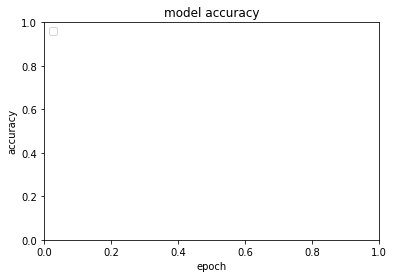

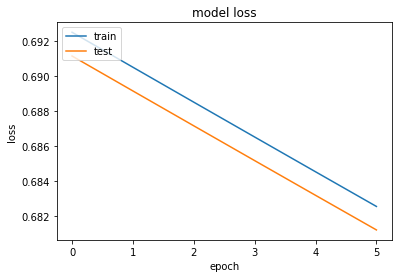

In [95]:
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

Text Classification with a Convolutional Neural Network

In [112]:
from keras.layers.convolutional import Conv1D
from keras.layers import GlobalMaxPooling1D


In [113]:
model = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [114]:
print(model.summary())


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 100)          385300    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 129       
Total params: 449,557
Trainable params: 64,257
Non-trainable params: 385,300
_________________________________________________________________
None


In [115]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/6
3/4 [=====================>........] - ETA: 0s - loss: 0.6926 - acc: 1.0000WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fd4ead506a8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
4/4 [==============================] - 0s 86ms/step - loss: 0.6926 - acc: 1.0000

In [116]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.6812291145324707
Test Accuracy: 1.0


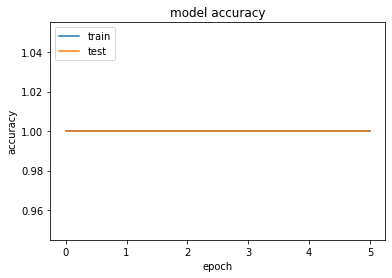

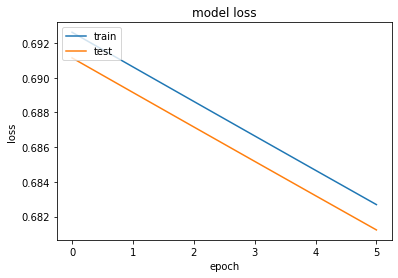

In [117]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

Text Classification with Recurrent Neural Network (LSTM)

In [119]:
from keras.layers.recurrent import LSTM


In [120]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [121]:
print(model.summary())


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 100)          385300    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 129       
Total params: 502,677
Trainable params: 117,377
Non-trainable params: 385,300
_________________________________________________________________
None


In [122]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/6
4/4 [==============================] - ETA: 0s - loss: 0.6843 - acc: 1.0000WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fd4ea170d90> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
4/4 [==============================] - 1s 349ms/step - loss: 0.6843 - acc: 1.000

In [124]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 5.7850429584505036e-05
Test Accuracy: 1.0


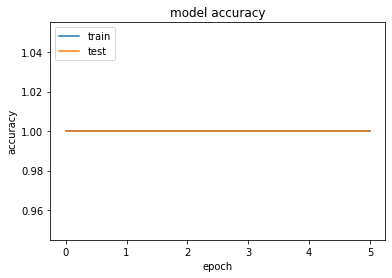

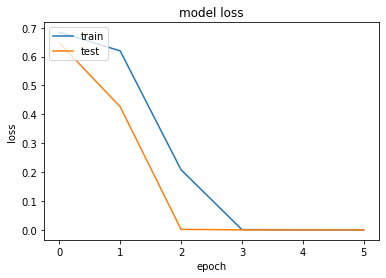

In [125]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [126]:
instance = X[57]
print(instance)

About Den incredible ornate and beautiful Rooms are artfully decorated smartly furnished and boast exceptional in room amenities The Chai was fabulous For explanation for food they are no words to say simply delicious The desserts will outstanding not just delicious but also beautifully decorated It was such great experience We had table beside the window corner which recommend if you can get one Looking out over the buildings shops from the main level at night times are really most Beautiful and relaxing The staff are simply phenomenal and friendly Ghouse Poozan Melory Anushrii Hima Visited like stranger and leaving with lot of heart full memories and friends 


In [127]:
instance = tokenizer.texts_to_sequences(instance)

flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]

instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)

model.predict(instance)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


array([[5.78521e-05]], dtype=float32)